# Simulation 1
See README.md for a short description.

## Simulation 1.1

The Setup


In [84]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import server as srv
import agent as agn

np.random.seed(0)

In [85]:
"""
Example setup
"""

# nports = the number of ports on the server
nports = 16

# probdetection is the probability that the server detects a scan, after which the server moves the flag
probdetection = 0.1
nepisodes = 100

# Setting the size of the slices of Q each agent will oversee
slic = nports//4

print(slic)

4


In [95]:
"""
Defining the functions we will use throughout the simulations
"""

# Taking in the number of agents and the size of the slice of Q that each agent will oversee
# return a list of agents, the A-team that will carry out the mission
def assemble_team(num_agent,slic):
    listy = []

    # if slic == 0, agents are initialized with the entire Q matrix
    if slic == 0:
        for i in range(num_agent):
            agent = agn.Agent(0,nports,nports, verbose=False)
            agent.set_learning_options(exploration=0.2, 
                                learningrate=0.1, 
                                discount=0.9, 
                                scanprobability=0.1)
            listy.append(agent)

    else:
        for i in range(num_agent):
            agent = agn.Agent((i)*slic,(i+1)*slic,nports, verbose=False)
            agent.set_learning_options(exploration=0.2, 
                                learningrate=0.1, 
                                discount=0.9, 
                                scanprobability=0.1)
            listy.append(agent)
    return listy

# M, the agent handler (like 007)
# Run the episodes for each agent
# return the average steps from each agent in the list
def M(agent_list,env):
    steps = []
    for agent in agent_list:
        agent.reset(env)
        agent.run_episode()
        steps.append(agent.steps)

    step = np.average(steps)

    return step

# Agents report on the success of their mission
# combine the matrices from each agent into a final product
def mission_report(ag_list,name, Diag = False):
    Q = [np.zeros(ag_list[0].nports+1)]
    Qd = np.identity(ag_list[0].nports+1)
    for agent in ag_list:
        # plt.matshow(agent.Q)
        Q += agent.Q
        if Diag:
            Qd *= agent.Q
    # plt.figure(figsize=(10,10))
    plt.matshow(Q)
    plt.suptitle(f"{name}")
    if Diag:
        plt.matshow(Qd)

# Q equips the agents with everything they need for the mission
# Q randomly generates the attributes for each agent
def Q(agent):
    ex = np.random.random()
    lern = np.random.random()
    disc = np.random.random()
    scan = np.random.random()

    agent.set_learning_options(exploration=ex, 
                            learningrate=lern, 
                            discount=disc, 
                            scanprobability=scan)


# random_team returns a list of random agents
def random_team(num_agent,slic):
    listy = []

    # slic of 0 gives a single random agent
    if slic == 0:
        agent = agn.Agent(0,num_agent,nports, verbose=False)
        Q(agent)
        
        listy = [agent]

    # create a list of random agents
    else:
        for i in range(num_agent):
            agent = agn.Agent((i)*slic,(i+1)*slic,nports, verbose=False)
            Q(agent)
            listy.append(agent)
    return listy

## Simulation 1.2
Demonstrating the slices and agent definitions

In [87]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import server as srv
import agent as agn

np.random.seed(0)

In [88]:
nports = 16

probdetection = 0.8
nepisodes = 100

slic = nports//4

print(slic)

4


In [89]:
"""
Here is how we initialize default agents one at a time
"""

agt_001 = agn.Agent(1,slic,nports, verbose=False)
agt_001.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)

agt_002 = agn.Agent(slic, 2*slic, nports, verbose=False)
agt_002.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)

agt_003 = agn.Agent(2*slic, 3*slic, nports, verbose=False)
agt_003.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)

agt_004 = agn.Agent(3*slic, 4*slic, nports, verbose=False)
agt_004.set_learning_options(exploration=0.2, 
                         learningrate=0.1, 
                         discount=0.9, 
                         scanprobability=0.1)

In [91]:
"""
Demonstrating the slices of the matrix for each agent
"""

steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    agt_001.reset(env)
    
    agt_001.run_episode()

    agt_002.reset(env)
    
    agt_002.run_episode()

    agt_003.reset(env)
    
    agt_003.run_episode()

    agt_004.reset(env)
    
    agt_004.run_episode()

    steps.append(agt_001.steps)

**********


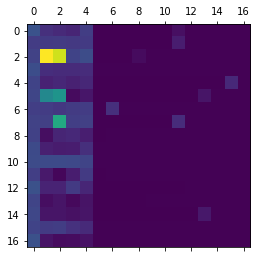

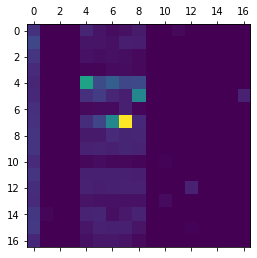

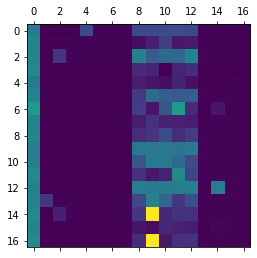

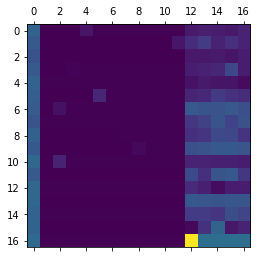

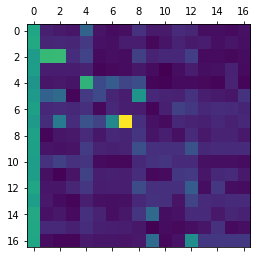

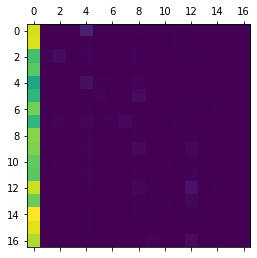

In [92]:
Q1 = agt_001.Q
Q2 = agt_002.Q
Q3 = agt_003.Q
Q4 = agt_004.Q

# Plotting the slices of our final Q given by each agent
plt.matshow(Q1)
plt.matshow(Q2)
plt.matshow(Q3)
plt.matshow(Q4)

# Next we build Q, the matrix given after all agents are considered
Q = Q1+Q2+Q3+Q4
plt.matshow(Q)
print("*"*10)

# Just for fun, seeing what happens when we multiply the matrices
Qd = Q1*Q2*Q3*Q4

plt.matshow(Qd)


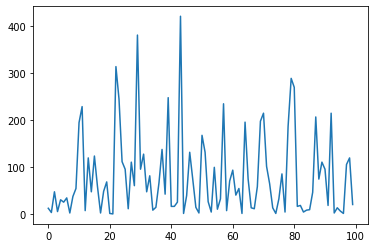

In [93]:
"""
Seeing how number of steps is affected.
For high scan detection probability, the number of agents and number of episodes doesn't affect
the number of required steps, because the server detects scans and moves the flag.
"""
plt.plot(np.arange(nepisodes),steps)


## Simulation 1.3
Testing

We will try several different base cases using default agent parameters and probdetection = 0.7

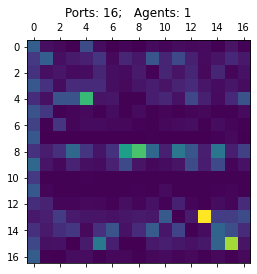

In [96]:
"""
The Control Group: 
16 ports
Default agents
probdetection = 0.7
Number of agents: 1
"""

nports = 16

# num_agent = 5

probdetection = 0.7
nepisodes = 100

ag_list = assemble_team(1,nports)

steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    step = M(ag_list,env)

    steps.append(step)

mission_report(ag_list,f"Ports: {nports};   Agents: {1}")

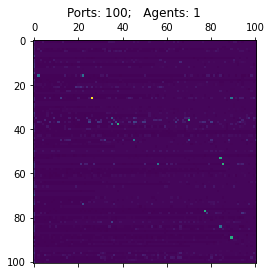

In [97]:
"""
100 Ports Control
Default agents
probdetection = 0.7
Number of agents: 1
"""

nports = 100

# num_agent = 5

probdetection = 0.7
nepisodes = 100

ag_list = assemble_team(1,nports)

steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    step = M(ag_list,env)

    steps.append(step)

mission_report(ag_list,f"Ports: {nports};   Agents: {1}")

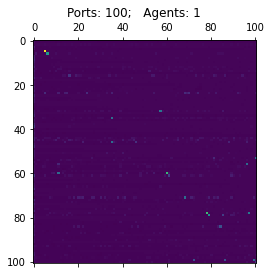

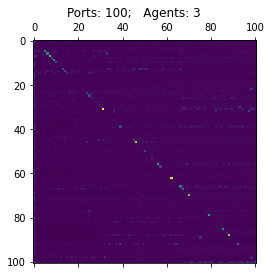

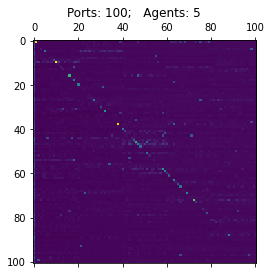

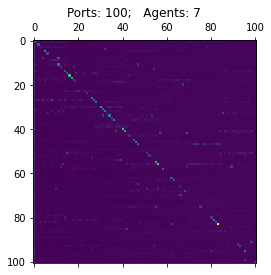

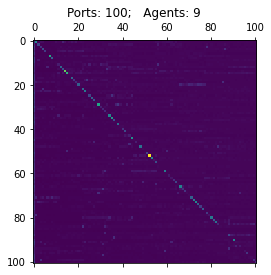

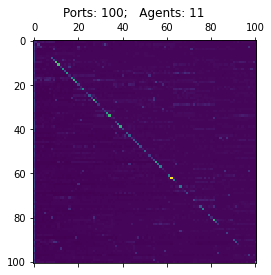

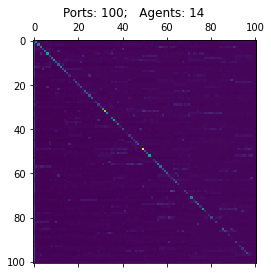

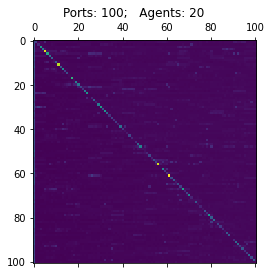

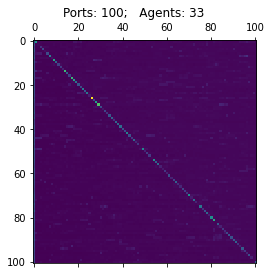

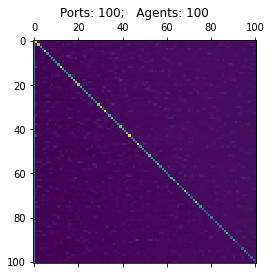

In [105]:
"""
Running 100 episodes for number of agents between 1 and nports
"""

nports = 100

probdetection = 0.7
nepisodes = 100

listy = sorted(list({nports//x for x in range(1,nports+1)}))
# listy = sorted(list(listy)[:len(listy):len(listy)//5])
listy = listy[::2]
all_steps = []
for i in listy:
    n_agent = i
    slic = nports//n_agent
    ag_list = assemble_team(n_agent,slic)

    steps = []
    for _ in range(nepisodes):
        
        vulnport = np.random.randint(1,nports+1)
        env = srv.Server(nports,vulnport,probdetection)
        step = M(ag_list,env)

        steps.append(step)
    all_steps.append(steps)
    mission_report(ag_list,f"Ports: {nports};   Agents: {n_agent}")


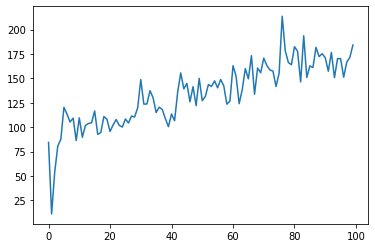

In [106]:
"""
Plotting some of the steps.

As with the original code, high scan detection gives low deviation of number of steps required.
Even for longer episodes

*In this case, it seems that the average steps required among the agents increases with number of episodes
"""

plt.plot(np.arange(nepisodes),steps)

# plt.legend(loc="upper right")

[115.23, 126.07333333333334, 132.14800000000002, 124.83428571428573, 124.26666666666668, 121.89272727272729, 128.62785714285712, 134.4845, 133.3269696969697, 134.3289]
[1, 3, 5, 7, 9, 11, 14, 20, 33, 100]


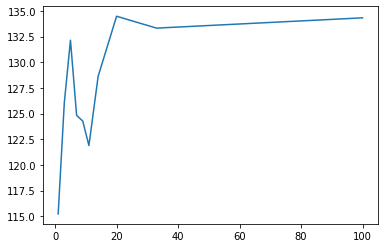

In [107]:
"""
Plotting the average number of steps required for each value of n_agent
"""

# np.average(all_steps[0])
num_agent_steps = []
for x in all_steps:
    num_agent_steps.append(np.average(x))
    
print(num_agent_steps)
print(listy)
plt.plot(listy,num_agent_steps)

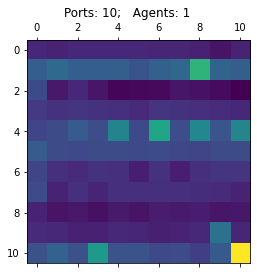

In [ ]:
"""
What if I increase the number of episodes to match what the total number of agents do?

10 Ports, 1000000 Episodes
"""

nports = 10

# num_agent = 5

probdetection = 0.7
nepisodes = 1000000

ag_list = assemble_team(1,nports)

steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    step = M(ag_list,env)

    steps.append(step)

mission_report(ag_list,f"Ports: {nports};   Agents: {1}")

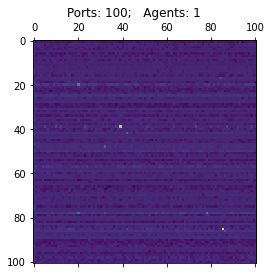

In [ ]:
"""
What if I increase the number of episodes to match what the total number of agents do?

100 Ports, 10000 Episodes
"""

nports = 100

# num_agent = 5

probdetection = 0.7
nepisodes = 10000

ag_list = assemble_team(1,nports)

steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    step = M(ag_list,env)

    steps.append(step)

mission_report(ag_list,f"Ports: {nports};   Agents: {1}")

30


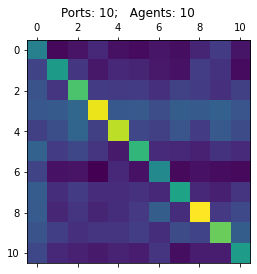

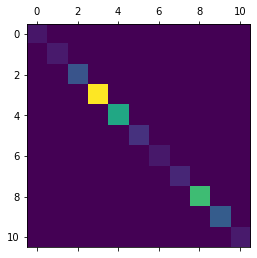

In [ ]:
"""
What if more agents than ports???

Check for low ports and high ports, and adjust episodes.

Here we run for 30 agents at 10000 episodes
Each agent is scanning the entire space

"""
nports = 10

probdetection = 0.7
nepisodes = 10000

ag_list = assemble_team(30,0)

steps = []
for _ in range(nepisodes):
    
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    step = M(ag_list,env)

    steps.append(step)

mission_report(ag_list,f"Ports: {nports};   Agents: {10}", Diag = True)

print(len(ag_list))


Multiplying the Q's from each matrix creates a nice diagonal. Is this a good strategy? I'm not sure

## Simulation 1.4
Now checking high probability for randomly generated agents

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import server as srv
import agent as agn

np.random.seed(0)

In [ ]:
# Taking in the number of agents and the size of the slice of Q that each agent will oversee
# return a list of agents, the A-team that will carry out the mission
def assemble_team(num_agent,slic):
    listy = []

    # if slic == 0, agents are initialized with the entire Q matrix
    if slic == 0:
        for i in range(num_agent):
            agent = agn.Agent(0,nports,nports, verbose=False)
            agent.set_learning_options(exploration=0.2, 
                                learningrate=0.1, 
                                discount=0.9, 
                                scanprobability=0.1)
            listy.append(agent)

    else:
        for i in range(num_agent):
            agent = agn.Agent((i)*slic,(i+1)*slic,nports, verbose=False)
            agent.set_learning_options(exploration=0.2, 
                                learningrate=0.1, 
                                discount=0.9, 
                                scanprobability=0.1)
            listy.append(agent)
    return listy

# M, the agent handler (like 007)
# Run the episodes for each agent
# return the average steps from each agent in the list
def M(agent_list,env):
    steps = []
    for agent in agent_list:
        agent.reset(env)
        agent.run_episode()
        steps.append(agent.step)

    step = np.average(steps)

    return step

# Agents report on the success of their mission
# combine the matrices from each agent into a final product
def mission_report(ag_list,name, Diag = False):
    Q = [np.zeros(ag_list[0].nports+1)]
    Qd = np.identity(ag_list[0].nports+1)
    for agent in ag_list:
        # plt.matshow(agent.Q)
        Q += agent.Q
        if Diag:
            Qd *= agent.Q
    # plt.figure(figsize=(10,10))
    plt.matshow(Q)
    plt.suptitle(f"{name}")
    if Diag:
        plt.matshow(Qd)

# Q equips the agents with everything they need for the mission
# Q randomly generates the attributes for each agent
def Q(agent):
    ex = np.random.random()
    lern = np.random.random()
    disc = np.random.random()
    scan = np.random.random()

    agent.set_learning_options(exploration=ex, 
                            learningrate=lern, 
                            discount=disc, 
                            scanprobability=scan)


# random_team returns a list of random agents
def random_team(num_agent,slic):
    listy = []

    # slic of 0 gives a single random agent
    if slic == 0:
        agent = agn.Agent(0,num_agent,nports, verbose=False)
        Q(agent)
        
        listy = [agent]

    # create a list of random agents
    else:
        for i in range(num_agent):
            agent = agn.Agent((i)*slic,(i+1)*slic,nports, verbose=False)
            Q(agent)
            listy.append(agent)
    return listy

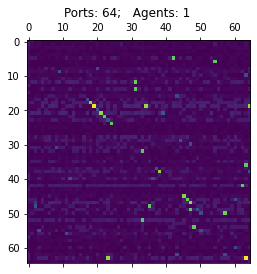

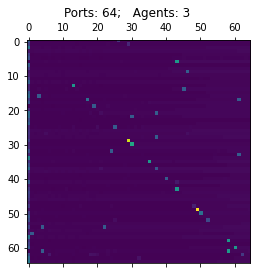

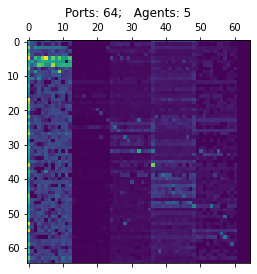

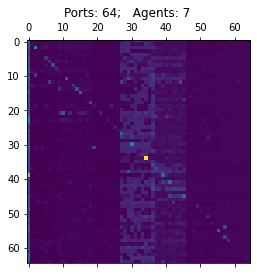

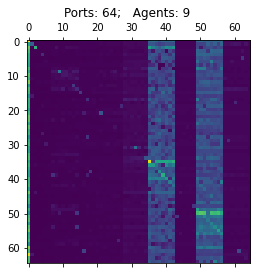

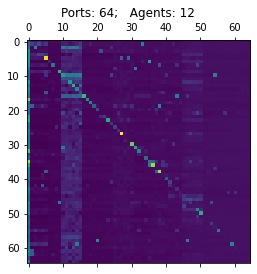

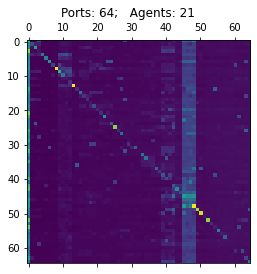

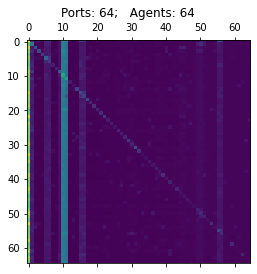

In [111]:
"""
Now we'll see what happens if we start with randomly generated agents

number of agents ranges from 1 to nports
Random agents
Tested nports = 16 and 
nports = 100 (took 1m 30s)
probdetection: 0.7
"""
nports = 64

probdetection = 0.7
nepisodes = 100

listy = sorted(list({nports//x for x in range(1,nports+1)}))
# listy = sorted(list(listy)[:len(listy):len(listy)//5])
listy = listy[::2]
all_steps = []
for i in listy:
    n_agent = i
    slic = nports//n_agent
    ag_list = random_team(n_agent,slic)

    steps = []
    for _ in range(nepisodes):
        
        vulnport = np.random.randint(1,nports+1)
        env = srv.Server(nports,vulnport,probdetection)
        step = M(ag_list,env)

        steps.append(step)
    all_steps.append(steps)
    
    mission_report(ag_list,f"Ports: {nports};   Agents: {n_agent}")

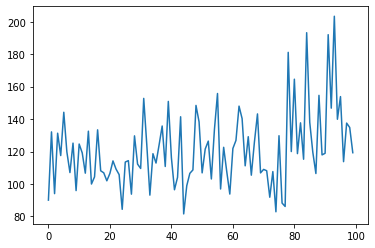

In [112]:
"""
Plotting some of the steps.

Seems random agents don't have large deviation in steps

"""

plt.plot(np.arange(nepisodes),steps)

[106.84, 83.00333333333334, 111.236, 100.03142857142856, 87.92555555555559, 103.63833333333332, 102.49238095238091, 121.0859375]
[1, 3, 5, 7, 9, 12, 21, 64]


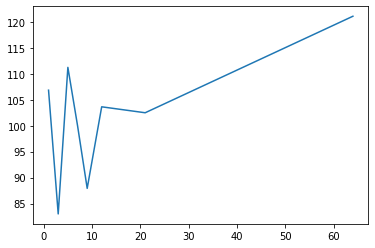

In [113]:
"""
Plotting the average number of steps required for each value of n_agent

The average appears to shoot up for more random agents
"""

# np.average(all_steps[0])
num_agent_steps = []
for x in all_steps:
    num_agent_steps.append(np.average(x))
    
print(num_agent_steps)
print(listy)
plt.plot(listy,num_agent_steps)

In [118]:
"""
That looks pretty bad. Let's adjust Q to give smaller numbers for everything except discount
"""


# Q equips the agents with everything they need for the mission
# Q randomly generates the attributes for each agent
def Q(agent):
    # adding 0.1 to each to avoid zero values
    ex = np.random.randint(1,4)/10
    lern = np.random.randint(1,4)/10
    disc = np.random.random()
    scan = np.random.randint(1,4)/10

    agent.set_learning_options(exploration=ex, 
                            learningrate=lern, 
                            discount=disc, 
                            scanprobability=scan)
    

# random_team returns a list of random agents
def random_team(num_agent,slic):
    listy = []

    # slic of 0 gives a single random agent
    if slic == 0:
        agent = agn.Agent(0,num_agent,nports, verbose=False)
        Q(agent)
        
        listy = [agent]

    # create a list of random agents
    else:
        for i in range(num_agent):
            agent = agn.Agent((i)*slic,(i+1)*slic,nports, verbose=False)
            Q(agent)
            listy.append(agent)
    return listy

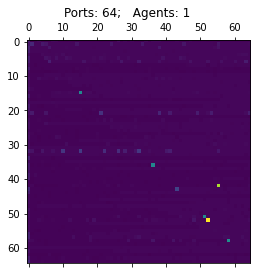

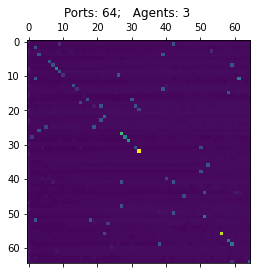

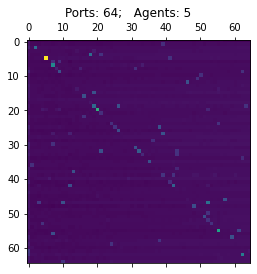

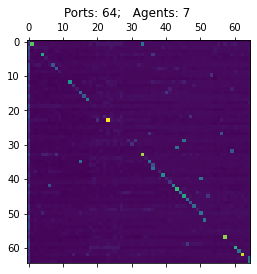

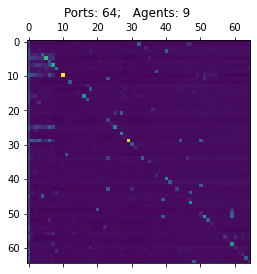

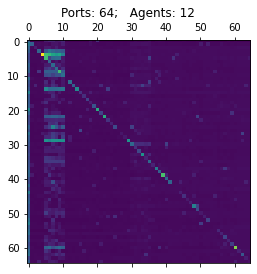

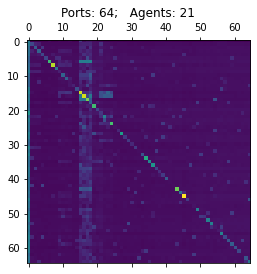

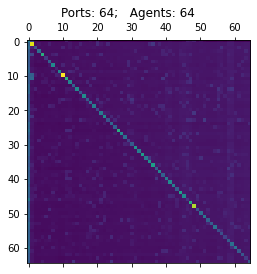

In [119]:
"""
Now we'll see what happens if we start with less randomly generated agents

Tested nports = 16 (took 4s)
and 
nports = 100 (took 1m 18s)

nports = 64
"""
nports = 64

probdetection = 0.7
nepisodes = 100

listy = sorted(list({nports//x for x in range(1,nports+1)}))
# listy = sorted(list(listy)[:len(listy):len(listy)//5])
listy = listy[::2]
all_steps = []
for i in listy:
    n_agent = i
    slic = nports//n_agent
    ag_list = random_team(n_agent,slic)

    steps = []
    for _ in range(nepisodes):
        
        vulnport = np.random.randint(1,nports+1)
        env = srv.Server(nports,vulnport,probdetection)
        step = M(ag_list,env)

        steps.append(step)
    
    all_steps.append(steps)
    mission_report(ag_list,f"Ports: {nports};   Agents: {n_agent}")

Notice that everything looks better than the completely random option, but still not better than the default for the nports = 100 case.

For nports = 16, the results are comparable to the default case, if not slightly worse or better depending on the run.

In [122]:
"""
One more random try.
Increasing the discovery while again decreasing everything else slightly
"""


# Q equips the agents with everything they need for the mission
# Q randomly generates the attributes for each agent
def Q(agent):
    ex = np.random.randint(1,3)/10
    lern = np.random.randint(1,3)/10
    disc = np.random.randint(8,10)/10-0.01 # Subtracting 0.01 to avoid 1 values
    scan = np.random.randint(1,3)/10

    agent.set_learning_options(exploration=ex, 
                            learningrate=lern, 
                            discount=disc, 
                            scanprobability=scan)
    

# random_team returns a list of random agents
def random_team(num_agent,slic):
    listy = []

    # slic of 0 gives a single random agent
    if slic == 0:
        agent = agn.Agent(0,num_agent,nports, verbose=False)
        Q(agent)
        
        listy = [agent]

    # create a list of random agents
    else:
        for i in range(num_agent):
            agent = agn.Agent((i)*slic,(i+1)*slic,nports, verbose=False)
            Q(agent)
            listy.append(agent)
    return listy

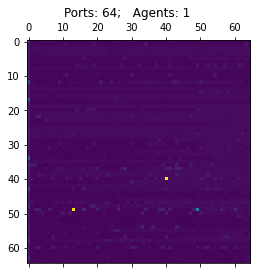

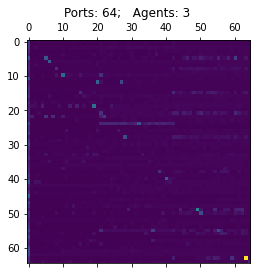

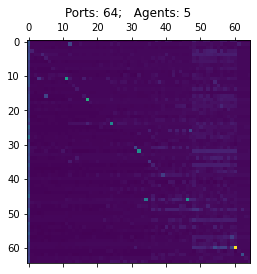

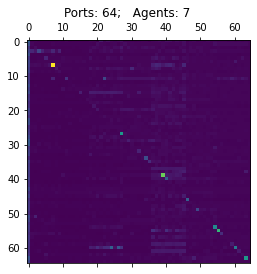

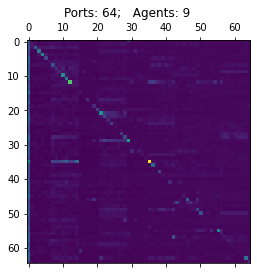

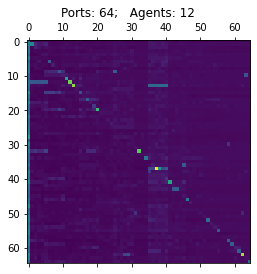

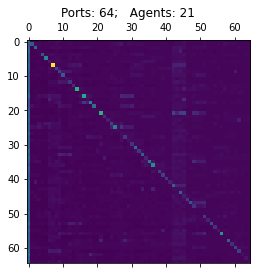

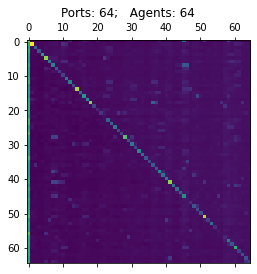

In [123]:
"""
Once again...

Tested nports = 16 (took 6s)
and 
nports = 100 (took 1m 18s)
"""
nports = 64

probdetection = 0.7
nepisodes = 100

listy = sorted(list({nports//x for x in range(1,nports+1)}))
# listy = sorted(list(listy)[:len(listy):len(listy)//5])
listy = listy[::2]
all_steps = []
for i in listy:
    n_agent = i
    slic = nports//n_agent
    ag_list = random_team(n_agent,slic)

    steps = []
    for _ in range(nepisodes):
        
        vulnport = np.random.randint(1,nports+1)
        env = srv.Server(nports,vulnport,probdetection)
        step = M(ag_list,env)

        steps.append(step)
    
    all_steps.append(steps)
    mission_report(ag_list,f"Ports: {nports};   Agents: {n_agent}")

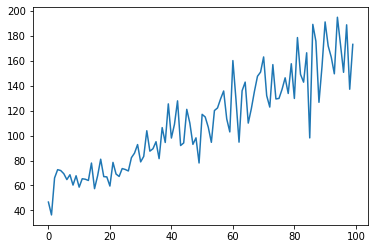

In [124]:
"""
Plotting some of the steps.

Now the number of steps has a clear increase with number of episodes

"""

plt.plot(np.arange(nepisodes),steps)

[141.13, 89.14, 102.85400000000001, 102.56285714285715, 95.96111111111111, 106.05749999999998, 105.95285714285714, 111.12140625]
[1, 3, 5, 7, 9, 12, 21, 64]


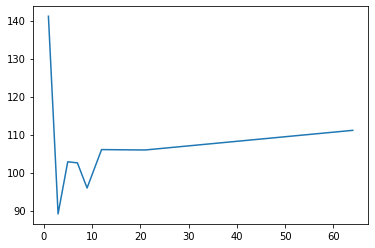

In [125]:
"""
Plotting the average number of steps required for each value of n_agent

The average seems more tame for random agents, but has a slight increase with increase in number of agents
"""

# np.average(all_steps[0])
num_agent_steps = []
for x in all_steps:
    num_agent_steps.append(np.average(x))
    
print(num_agent_steps)
print(listy)
plt.plot(listy,num_agent_steps)

Seems that, even with adjusting the parameters greatly, random agents do not perform as well as the default agents

For the 100 ports case, we still have quick convergence, but there is a lot of extra noise in the early cases. More agents reduce the noise to be comparable with the default agents.

## Simulation 1.5
We run the training for *probdetection* = 0.4 instead

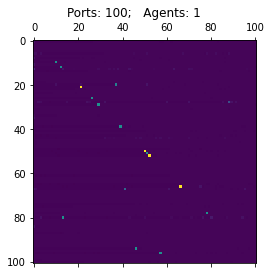

In [126]:
nports = 100

agent = agn.Agent(0,nports,nports,verbose=False)

agent.set_learning_options()

probdetection = 0.4

for i in range(27):
    vulnport = np.random.randint(1,nports+1)
    env = srv.Server(nports,vulnport,probdetection)
    step = M([agent],env)
mission_report([agent],f"Ports: {nports};   Agents: {1}")

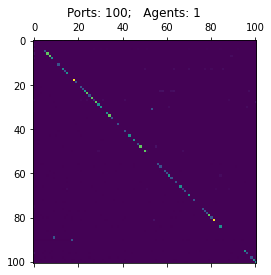

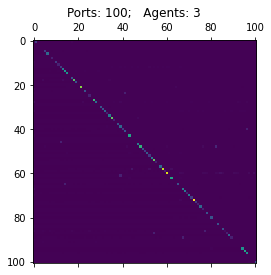

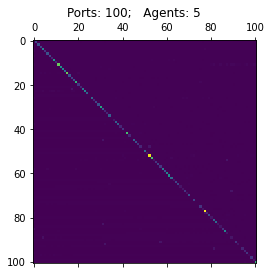

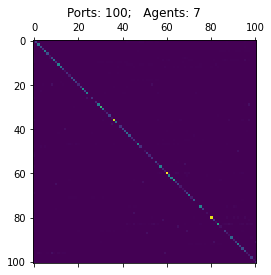

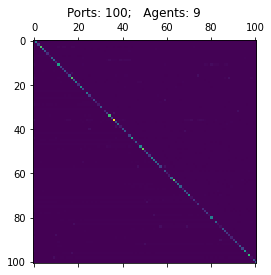

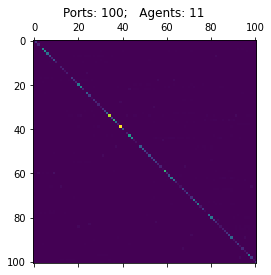

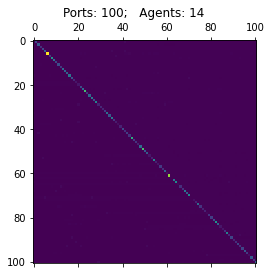

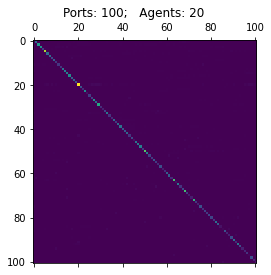

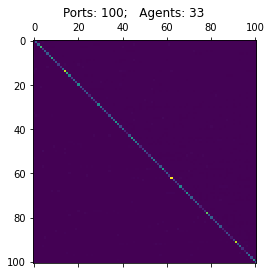

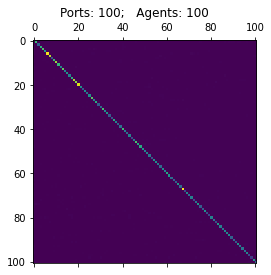

In [127]:
"""
Running 100 episodes for number of agents between 1 and nports

Note that lower numbers of agents need more episodes to converge, 
while with more agents, they converge quickly (try 25 episodes)
"""

nports = 100

probdetection = 0.1
nepisodes = 100

listy = sorted(list({nports//x for x in range(1,nports+1)}))
# listy = sorted(list(listy)[:len(listy):len(listy)//5])
listy = listy[::2]
all_steps = []
for i in listy:
    n_agent = i
    slic = nports//n_agent
    ag_list = assemble_team(n_agent,slic)

    steps = []
    for _ in range(nepisodes):
        
        vulnport = np.random.randint(1,nports+1)
        env = srv.Server(nports,vulnport,probdetection)
        step = M(ag_list,env)

        steps.append(step)
    all_steps.append(steps)

    mission_report(ag_list,f"Ports: {nports};   Agents: {n_agent}")


[41.25, 43.13666666666667, 40.82, 43.32, 45.21222222222222, 44.68909090909091, 44.17214285714285, 41.776500000000006, 44.3669696969697, 45.89490000000001]
[1, 3, 5, 7, 9, 11, 14, 20, 33, 100]


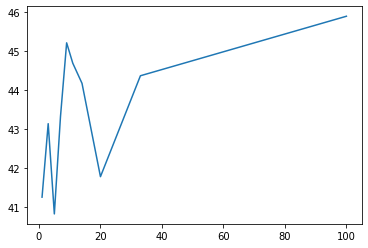

In [131]:
"""
Plotting the average number of steps required for each value of n_agent

Appears to have another increase with number of agents
This could be caused by the way num_agent_steps is computed

"""

# np.average(all_steps[0])
num_agent_steps = []
for x in all_steps:
    num_agent_steps.append(np.average(x))
    
print(num_agent_steps)
print(listy)
plt.plot(listy,num_agent_steps)

Notice that with more agents, less steps are required. This is more noticeable with smaller values of nports. With nports = 100, it seems more sporadic at lower episodes and smooths out for larger episodes.

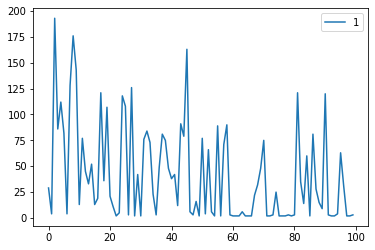

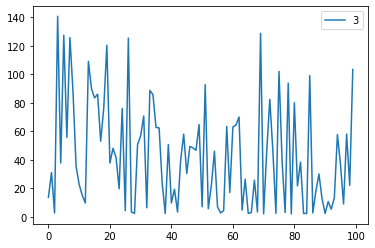

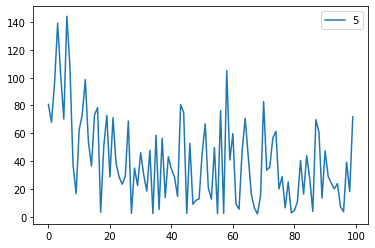

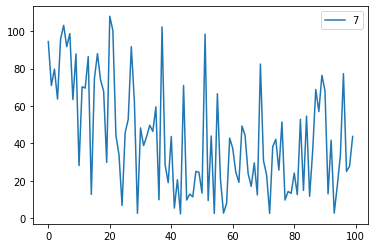

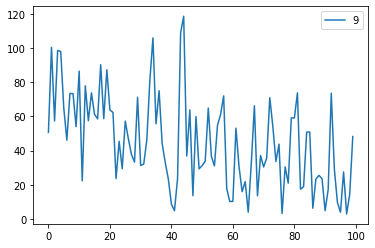

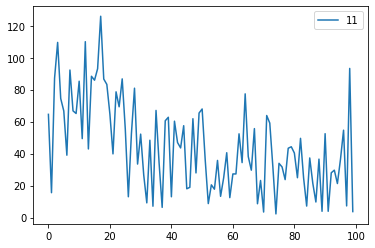

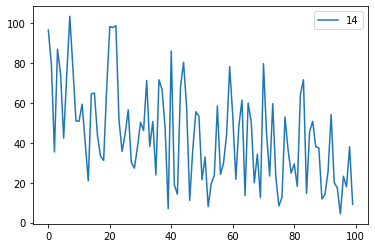

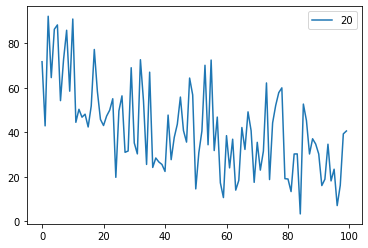

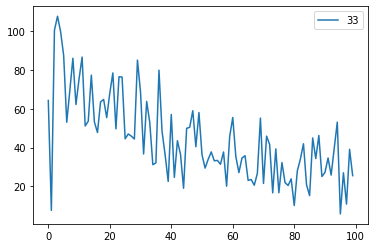

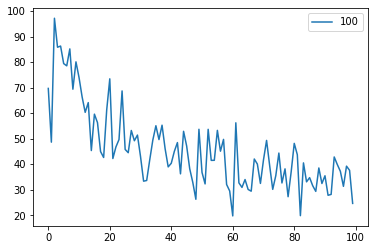

In [129]:
"""
Plotting some of the steps.

As with the original code, high scan detection gives low deviation of number of steps required.
Even for longer episodes.

Here, steps required seems to decrease as agents are added and episodes increase, 
which is contrary to the above graph

This leads me to believe I'm computing num_agent_steps in a bad way
"""

for i in range(len(listy)):
    x = plt.plot(np.arange(nepisodes),all_steps[i],label=f"{listy[i]}")
    plt.legend(loc="upper right")
    plt.show()

We notice that the steps don't seem to decrease with time when probdetection is greater than 0.1. It does, however, decrease with an increase in agents for low probdetection values. For probdetection=0, steps decrease with an increase in the number of agents, as well as with more episodes. 

## Simulation 2.5
This is simulation 2.5 from the original code.

I haven't done anything with it yet, but it seems like a good place to start gathering more data.

We run simulations with different values of probdetection for $100$ times in order to collect statistics.

In [ ]:
ntrials = 100

probdetections = np.linspace(0,1,11)
nprobdetection = len(probdetections)

nepisodes = 1000

steps = np.zeros((ntrials,nprobdetection,nepisodes))
Q_diag = np.zeros((ntrials,nprobdetection,nepisodes))
Q_ndiag = np.zeros((ntrials,nprobdetection,nepisodes))
Qs = np.zeros((ntrials,nprobdetection,nports+1,nports+1))

for t in tqdm(range(ntrials)):

    agt = agn.Agent(nports,verbose=False)
    agt.set_learning_options(exploration=0.2, 
                             learningrate=0.1, 
                             discount=0.9, 
                             scanprobability=0.1)

    for p in range(nprobdetection):
        probdetection = probdetections[p]
    
        nepisodes = 1000
        for e in range(nepisodes):

            vulnport = np.random.randint(1,nports+1)
            env = srv.Server(nports,vulnport,probdetection)
            agt.reset(env)

            agt.run_episode()

            steps[t,p,e] = agt.steps
            Q_diag[t,p,e] = np.sum(np.diag(agt.Q))
            Q_ndiag[t,p,e] = np.sum(agt.Q)
            Qs[t,p,:,:] = agt.Q

  0%|          | 0/100 [00:00<?, ?it/s]

TypeError: __init__() missing 2 required positional arguments: 'portEnd' and 'nports'

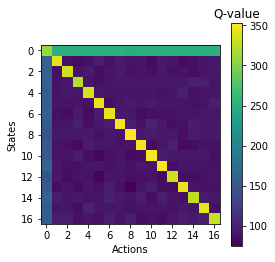

In [ ]:
plt.matshow(np.mean(Qs[:,1,:,:],axis=0))

plt.xlabel('Actions')
plt.ylabel('States')
plt.tick_params(axis='x',bottom=True,top=False,labelbottom=True,labeltop=False)

clb = plt.colorbar()
clb.ax.set_title('Q-value')

plt.savefig('simul2_matrix1',dpi=300)

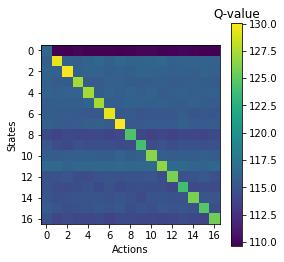

In [ ]:
plt.matshow(np.mean(Qs[:,5,:,:],axis=0))

plt.xlabel('Actions')
plt.ylabel('States')
plt.tick_params(axis='x',bottom=True,top=False,labelbottom=True,labeltop=False)

clb = plt.colorbar()
clb.ax.set_title('Q-value')

plt.savefig('simul2_matrix2',dpi=300)

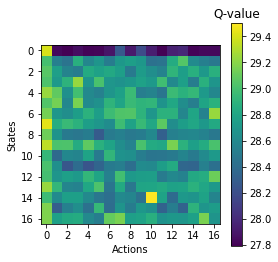

In [ ]:
plt.matshow(np.mean(Qs[:,10,:,:],axis=0))

plt.xlabel('Actions')
plt.ylabel('States')
plt.tick_params(axis='x',bottom=True,top=False,labelbottom=True,labeltop=False)

clb = plt.colorbar()
clb.ax.set_title('Q-value')

plt.savefig('simul2_matrix3',dpi=300)

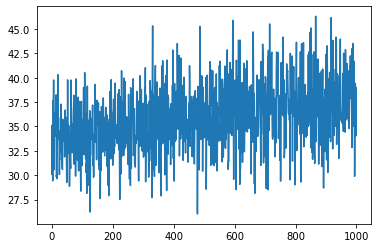

In [ ]:
plt.plot(range(nepisodes),np.mean(steps[:,10,:],axis=0))

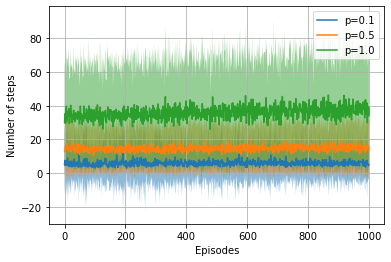

In [ ]:
x = range(nepisodes)
y = np.mean(steps[:,1,:],axis=0); ystd = np.std(steps[:,1,:],axis=0)
plt.plot(x,y,label='p=0.1')
plt.fill_between(x,y-ystd,y+ystd,alpha=.5)

y = np.mean(steps[:,5,:],axis=0); ystd = np.std(steps[:,5,:],axis=0)
plt.plot(x,y,label='p=0.5')
plt.fill_between(x,y-ystd,y+ystd,alpha=.5)

y = np.mean(steps[:,10,:],axis=0); ystd = np.std(steps[:,10,:],axis=0)
plt.plot(x,y,label='p=1.0')
plt.fill_between(x,y-ystd,y+ystd,alpha=.5)

plt.xlabel('Episodes')
plt.ylabel('Number of steps')
plt.legend()
plt.grid()

plt.savefig('simul2_steps',dpi=300)